In [16]:
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context="talk")

In [54]:
df = pd.read_csv('../data/articles.csv')
df.head()

,year,month,title,lang,categories,is_translated,is_post,is_cheatsheet,is_interview,is_talk,is_handbook
0,2017,3,My first year as a developer,english,['english'],True,True,False,False,False,False
1,2019,1,The most common data science tools,english,['english'],True,True,False,False,False,False
2,2016,5,There is just too much information..,english,['english'],False,True,False,False,False,False
3,2016,10,Dev para leigos,pt-br,['pt-br'],True,True,False,False,False,False
4,2019,2,"Minha experiência com blogs, sites e meus textos",pt-br,['pt-br'],True,True,False,False,False,False


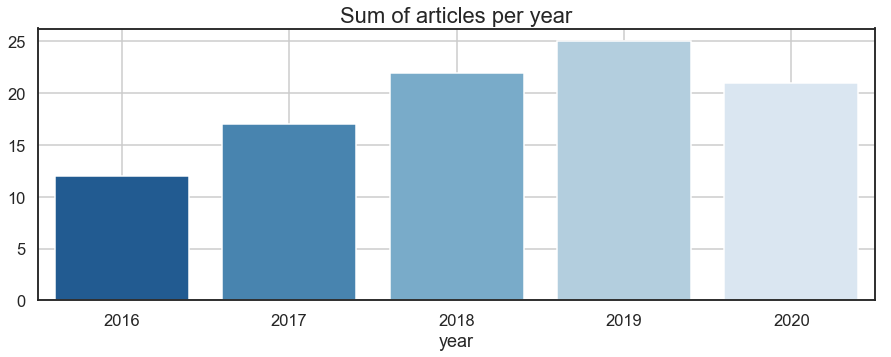

In [39]:
articles_per_year = df.groupby(['year'])['lang'].count()

plt.figure(figsize=(15,5))
sns.barplot(x=articles_per_year.index, y=articles_per_year.values, palette='Blues_r')
plt.title('Sum of articles per year', fontsize=22)
plt.grid()

In [40]:
articles_per_year

year
2016    12
2017    17
2018    22
2019    25
2020    21
Name: lang, dtype: int64

# Articles per year and category

Text(40.5, 0.5, '')

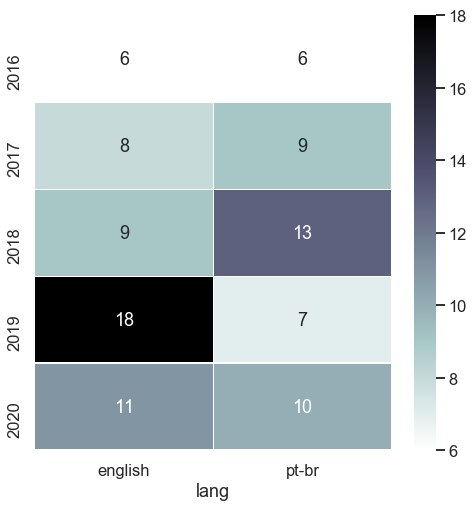

In [41]:
articles_per_year_per_cat = df.groupby(['year', 'lang'])['lang'].count().unstack()

plt.figure(figsize=(8,8))
sns.heatmap(articles_per_year_per_cat, annot=True, linewidths=.5, cmap='bone_r')
plt.ylabel('')
#plt.xlabel('Category')

# Articles per month

In [42]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
sum_per_month = np.zeros(12)


articles_per_month = df.month.value_counts()
for i in range(1, 13):
    try:
        sum_per_month[i-1] = articles_per_month.loc[i]
    except KeyError:
        pass

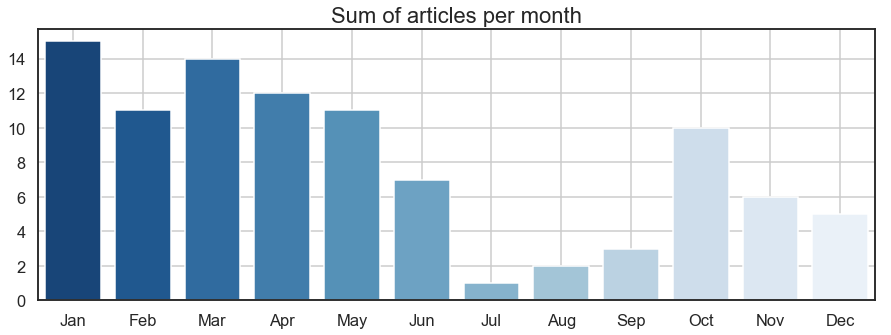

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x=months, y=sum_per_month, palette='Blues_r')
plt.title('Sum of articles per month', fontsize=22)
plt.grid()

In [55]:
df

,year,month,title,lang,categories,is_translated,is_post,is_cheatsheet,is_interview,is_talk,is_handbook
0,2017,3,My first year as a developer,english,['english'],True,True,False,False,False,False
1,2019,1,The most common data science tools,english,['english'],True,True,False,False,False,False
2,2016,5,There is just too much information..,english,['english'],False,True,False,False,False,False
3,2016,10,Dev para leigos,pt-br,['pt-br'],True,True,False,False,False,False
4,2019,2,"Minha experiência com blogs, sites e meus textos",pt-br,['pt-br'],True,True,False,False,False,False
5,2020,5,What does it mean to test software?,english,"['english', 'handbook']",False,False,False,False,False,True
6,2019,1,SQLAlchemy Basics Tutorial,english,['english'],True,True,False,False,False,False
7,2016,3,The same old story: how can I start learning t...,english,['english'],False,True,False,False,False,False
8,2019,3,Why should your company be in technology commu...,english,['english'],True,True,False,False,False,False
9,2019,10,Que belo dia para a ciência!,pt-br,"['pt-br', 'talks']",False,False,False,False,True,False


In [56]:
print('Total number: ', df.shape[0])
print('Blog posts: ', df[df.is_post==True].shape[0])
print('Translated blog posts: ', df[df.is_translated==True].shape[0])
print('Interviews: ', df[df.is_interview==True].shape[0])
print('Talks: ', df[df.is_talk==True].shape[0])



Total number:  97
Blog posts:  79
Translated blog posts:  46
Interviews:  2
Talks:  8
